In [10]:
%%capture
# move to src folder so we can import code
%cd ../src

In [12]:
from common.kaggle import download_data
import config

In [13]:
download_data(config.COMPETITION, config.DATA_INPUT)

# Let's take a look at the data

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv(config.TRAINING_DATA)
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0


In [16]:
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

The dataset consists of all kinds of categorical variables. Overall, there are:
* Five binary variables
* Ten nominal variables
* Six ordinal variables
* Two cyclic variables
* A target variable

In [18]:
pd.unique(df.target)

array([0, 1])

It's a binary classification problem

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# magic function to draw inside the notebook
%matplotlib inline

In [22]:
type(df.target)

pandas.core.series.Series

Text(0, 0.5, 'count')

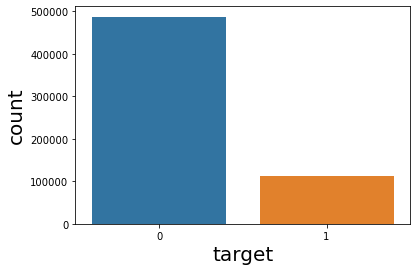

In [25]:
b = sns.countplot(x="target", data=df)
b.set_xlabel("target", fontsize=20)
b.set_ylabel("count", fontsize=20)

The target is heavily **skewed**, so we should use **AUC** as metric